In [18]:
import pandas as pd
import copy
from datetime import datetime

In [19]:
data = pd.read_csv("/Users/boni.nugraha/Downloads/Taxi_Trips.csv")

/var/folders/rx/bd4w1_rj14dc769hx_f2fy800000gp/T/ipykernel_44694/4242137954.py:1: DtypeWarning: Columns (5,10,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/Users/boni.nugraha/Downloads/Taxi_Trips.csv")


# ALL DATA CLEANUP

In [30]:
data_ = copy.deepcopy(data)

# Delete unused cols
del data_["Pickup Census Tract"] # This is not complete
del data_["Dropoff Census Tract"] # This is not complete
del data_["Trip ID"] # This is irrelevant
del data_["Taxi ID"] # This is irrelevant
del data_["Pickup Centroid Location"] # Already accomodated in other cols
del data_["Dropoff Centroid  Location"] # Already accomodated in other cols
del data_["Fare"] # This is not complete and already accomodated in Trip Total col
del data_["Trip Miles"] # This is not complete
del data_["Trip End Timestamp"] # This is not relevant, it's better to use Trip Seconds instead
del data_["Company"] # Name can changes over time, and company can closed anytime.
data_.dropna(inplace=True)
data_.shape

(2631878, 13)

In [31]:
# Clean and transform
data_["Trip Total"] = data_["Trip Total"].str.replace(",", "").astype(float)
data_["Trip Seconds"] = data_["Trip Seconds"].str.replace(",", "").astype(float)
data_["Extras"] = data_["Extras"].str.replace(",", "").astype(float)

data_["Trip Start Timestamp"] = data_.apply(lambda x: datetime.strptime(x["Trip Start Timestamp"], "%m/%d/%Y %I:%M:%S %p"), axis=1)

In [32]:
# Remove NAs and 0s
data_.dropna(inplace=True)
data_ = data_[data_["Trip Total"] > 0]

data_.shape

(2297168, 13)

In [33]:
# Transformation
data_["month"] = data_["Trip Start Timestamp"].dt.month
data_["day"] = data_["Trip Start Timestamp"].dt.day
data_["dayofweek"] = data_["Trip Start Timestamp"].dt.dayofweek
data_["hour"] = data_["Trip Start Timestamp"].dt.hour
del data_["Trip Start Timestamp"] # Remove unused col

data_["Pickup Community Area"] = data_["Pickup Community Area"].astype(int)
data_["Pickup Community Area"] = data_["Pickup Community Area"].astype(str)
data_["Dropoff Community Area"] = data_["Dropoff Community Area"].astype(int)
data_["Dropoff Community Area"] = data_["Dropoff Community Area"].astype(str)

data_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2297168 entries, 0 to 3128912
Data columns (total 16 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Trip Seconds                float64
 1   Pickup Community Area       object 
 2   Dropoff Community Area      object 
 3   Tips                        float64
 4   Tolls                       float64
 5   Extras                      float64
 6   Trip Total                  float64
 7   Payment Type                object 
 8   Pickup Centroid Latitude    float64
 9   Pickup Centroid Longitude   float64
 10  Dropoff Centroid Latitude   float64
 11  Dropoff Centroid Longitude  float64
 12  month                       int32  
 13  day                         int32  
 14  dayofweek                   int32  
 15  hour                        int32  
dtypes: float64(9), int32(4), object(3)
memory usage: 262.9+ MB


In [28]:
data_dum = pd.get_dummies(data_, drop_first=True)
cols = [c.lower().replace(" ", "_") for c in data_dum.columns]
data_dum.columns = cols
data_dum

,trip_seconds,tips,tolls,extras,trip_total,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_centroid_latitude,dropoff_centroid_longitude,month,...,dropoff_community_area_8,dropoff_community_area_9,payment_type_credit_card,payment_type_dispute,payment_type_mobile,payment_type_no_charge,payment_type_pcard,payment_type_prcard,payment_type_prepaid,payment_type_unknown
0,480.0,2.00,0.0,1.0,11.25,41.907492,-87.635760,41.885281,-87.657233,10,...,False,False,True,False,False,False,False,False,False,False
1,300.0,0.00,0.0,0.0,6.45,41.914616,-87.631717,41.899156,-87.626211,9,...,True,False,False,False,False,False,False,False,False,False
2,2220.0,6.00,0.0,2.0,36.05,41.980264,-87.913625,41.975171,-87.687516,10,...,False,False,True,False,False,False,False,False,False,False
3,480.0,0.00,0.0,0.0,6.25,41.884987,-87.620993,41.880994,-87.632746,10,...,False,False,False,False,False,False,False,False,False,False
4,480.0,2.00,0.0,0.0,8.65,41.902788,-87.626146,41.890922,-87.618868,10,...,True,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3128907,780.0,2.00,0.0,0.0,10.85,41.879255,-87.642649,41.891972,-87.612945,12,...,True,False,True,False,False,False,False,False,False,False
3128908,1080.0,2.35,0.0,1.5,14.10,41.880994,-87.632746,41.898332,-87.620763,11,...,True,False,True,False,False,False,False,False,False,False
3128910,300.0,0.00,0.0,1.0,6.25,41.892508,-87.626215,41.900266,-87.632109,11,...,True,False,False,False,False,False,False,False,False,False
3128911,1140.0,0.00,0.0,0.0,12.25,41.953582,-87.723452,41.944227,-87.655998,11,...,False,False,False,False,False,True,False,False,False,False


In [29]:
data_dum.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2297168 entries, 0 to 3128912
Columns: 173 entries, trip_seconds to payment_type_unknown
dtypes: bool(160), float64(9), int32(4)
memory usage: 560.8 MB


# TRAIN TEST SPLIT

In [66]:

from sklearn.model_selection import train_test_split
data_dum = data_dum[data_dum["trip_total"] <= 25]
X = data_dum.drop(["trip_total", "tips", "tolls", "extras"], axis=1)
y = data_dum["trip_total"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# TRAIN MODEL XGBOOST

In [67]:
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

# EVALUATE MODEL

In [ ]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from numpy import absolute

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_test, y_test, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

## SIMPLE EVALUATION

In [68]:
import numpy as np
from sklearn.metrics import mean_squared_error as MSE

pred = model.predict(X_test)
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" %(rmse))

RMSE :  1.273977


In [45]:
y_train[y_train > 1000].sort_values()

1447455    1000.95
1863630    1002.70
1632525    1003.74
2549348    1005.25
3033462    1007.63
            ...   
1915623    8873.21
315647     8889.91
33311      8896.03
2512975    8917.36
2185772    9364.85
Name: trip_total, Length: 171, dtype: float64

<Axes: ylabel='Frequency'>

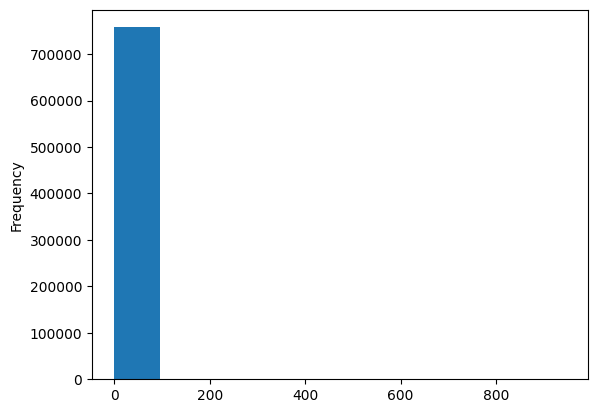

In [59]:
y_test.plot.hist()

<Axes: >

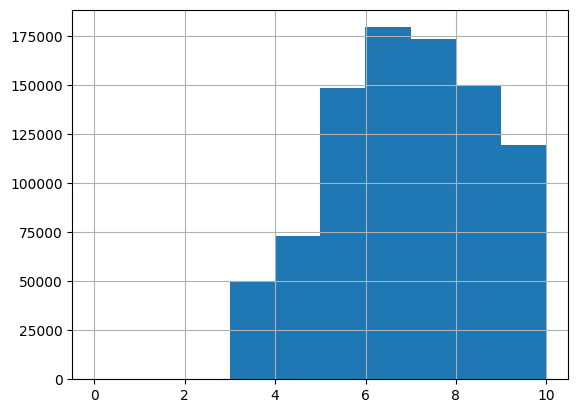

In [64]:
y_train[y_train.values < 10].hist()